In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits

* **Implement a simple neural network (Multi Layer Perceptron) on Scikit-Learn digits dataset**
 


In [36]:
dataset = load_digits()
X = dataset.data
Y = dataset.target
Y = np.eye(10)[Y] # one hot

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))

In [37]:
def sigmoid(X):
  return 1 / (1 + np.exp(-X))

def softmax(X):
  return np.exp(X) / np.sum(np.exp(X))

def root_mean_squired_error(Y_gt, Y_pred):
  return np.sqrt(np.mean((Y_gt - Y_pred) ** 2))

In [38]:
epochs = 80
η = 0.001 # learning rate

D_in = X_train.shape[1]
H1 = 128
H2 = 32
D_out = Y_train.shape[1]

In [39]:
W1 = np.random.randn(D_in, H1)
W2 = np.random.randn(H1, H2)
W3 = np.random.randn(H2, D_out)

In [40]:
B1 = np.random.randn(1, H1)
B2 = np.random.randn(1, H2)
B3 = np.random.randn(1, D_out)

In [41]:
for epoch in range(epochs):
  Y_pred_train = []

  # train

  for x, y in zip(X_train, Y_train):

      x = x.reshape(-1, 1)

      # forward

      # layer 1
      out1 = sigmoid(x.T @ W1 + B1)

      # layer 2
      out2 = sigmoid(out1 @ W2 + B2)

      # layer 3
      y_pred = softmax(out2 @ W3 + B3)

      Y_pred_train.append(y_pred)

      # backward

      # layer 3
      erorr = -2 * (y - y_pred)
      grad_B3 = erorr
      grad_W3 = out2.T @ erorr

      # layer 2
      erorr = erorr @ W3.T * out2 * (1 - out2)
      grad_B2 = erorr
      grad_W2 = out1.T @ erorr

      # layer 1
      erorr = erorr @ W2.T * out1 * (1 - out1)
      grad_B1 = erorr
      grad_W1 = x @ erorr

      # update

      # layer 1
      W1 -= η * grad_W1
      B1 -= η * grad_B1

      # layer 2
      W2 -= η * grad_W2
      B2 -= η * grad_B2

      # layer 3
      W3 -= η * grad_W3
      B3 -= η * grad_B3

  # test

  Y_pred_test = []
  for x, y in zip(X_test, Y_test):

      x = x.reshape(-1, 1)

      # forward

      # layer 1
      out1 = sigmoid(x.T @ W1 + B1)

      # layer 2
      out2 = sigmoid(out1 @ W2 + B2)

      # layer 3
      y_pred = softmax(out2 @ W3 + B3)

      Y_pred_test.append(y_pred)



In [42]:
  Y_pred_train = np.array(Y_pred_train).reshape(-1, 10)
  loss_train = root_mean_squired_error(Y_train, Y_pred_train)
  accuracy_train = np.mean(np.argmax(Y_train, axis=1) == np.argmax(Y_pred_train, axis=1))
  print('loss train : ',loss_train)
  print('accuracy train : ',accuracy_train)

  Y_pred_test = np.array(Y_pred_test).reshape(-1, 10)
  loss_test = root_mean_squired_error(Y_test, Y_pred_test)
  accuracy_test = np.mean(np.argmax(Y_test, axis=1) == np.argmax(Y_pred_test, axis=1))
  print('loss test : ',loss_test)
  print('accuracy test : ',accuracy_test)

loss train :  0.058154717522257156
accuracy train :  0.9846903270702854
loss test :  0.13935409191973178
accuracy test :  0.8722222222222222


* **Implement your neural network as a class (Object Oriented Programming)**

In [67]:
class MLP:
    def __init__(self, Input_length, Hidden_Layer1, Function_Hidden_Layer1, Hidden_Layer2, Function_Hidden_Layer2, Output_Length, Function_Output, epochs, η):
        self.epochs = epochs
        self.η = η

        self.D_in = Input_length
        self.H1 = Hidden_Layer1
        self.H2 = Hidden_Layer2
        self.D_out = Output_Length

        self.func_H1 = Function_Hidden_Layer1
        self.func_H2 = Function_Hidden_Layer2
        self.func_out = Function_Output

        self.W1 = np.random.randn(D_in, H1)
        self.W2 = np.random.randn(H1, H2)
        self.W3 = np.random.randn(H2, D_out)

        self.B1 = np.random.randn(1, H1)
        self.B2 = np.random.randn(1, H2)
        self.B3 = np.random.randn(1, D_out)

        self.Y_pred_train = []
        self.Y_pred_test = []

        self.accuracies = []
        self.losses = []

    def activation(self, function, x):
        if function == "sigmoid":
            return 1/(1 + np.exp(-x))
        
        if function == "softmax":
            return np.exp(x)/np.sum(np.exp(x))

    def fit(self, X_train, Y_train):
        for epoch in range(self.epochs):
            self.Y_pred_train = []

            for x, y in zip(X_train, Y_train):
                x = x.reshape(-1, 1)

                # forward

                # layer 1
                out1 = self.activation(self.func_H1, x.T @ self.W1 + self.B1)

                # layer 2
                out2 = self.activation(self.func_H2, out1 @ self.W2 + self.B2)

                # layer 3
                y_pred = self.activation(self.func_out, out2 @ self.W3 + self.B3)

                self.Y_pred_train.append(y_pred)

                # backward

                # layer 3
                erorr = -2 * (y - y_pred)
                grad_B3 = erorr
                grad_W3 = out2.T @ erorr

                # layer 2
                erorr = erorr @ self.W3.T * out2 * (1 - out2)
                grad_B2 = erorr
                grad_W2 = out1.T @ erorr

                # layer 1
                erorr = erorr @ self.W2.T * out1 * (1 - out1)
                grad_B1 = erorr
                grad_W1 = x @ erorr

                # update

                # layer 1
                self.W1 -= self.η * grad_W1
                self.B1 -= self.η * grad_B1

                # layer 2
                self.W2 -= self.η * grad_W2
                self.B2 -= self.η * grad_B2

                # layer 3
                self.W3 -= self.η * grad_W3
                self.B3 -= self.η * grad_B3
            loss, accuracy = self.evaluate(X_train, Y_train)

            self.accuracies.append(accuracy)
            self.losses.append(loss)

    def predict(self, X_test):
        self.Y_pred_test = []
        for x in X_test:
            
            x = x.reshape(-1,1)

            # forward

            # layer 1
            out1 = self.activation(self.func_H1, x.T @ self.W1 + self.B1)

            # layer 2
            out2 = self.activation(self.func_H2, out1 @ self.W2 + self.B2)

            # layer 3
            y_pred = self.activation(self.func_out, out2 @ self.W3 + self.B3)

            self.Y_pred_test.append(y_pred)
            return self.Y_pred_test

    def calculate_loss(self, Y_pred, Y_test, metric='mse'):
        if metric == 'mse':
            loss = np.mean((Y_pred - Y_test) ** 2)

        elif metric == 'mae':
            loss = np.mean(np.abs(Y_pred - Y_test))

        elif metric == 'rmse':
            loss = np.sqrt(np.mean((Y_pred - Y_test) ** 2))
        else:
            raise Exception('Metric not found!')
        return loss


    def calculate_accuracy(self, Y_pred, Y_test):
        accuracy = np.mean(np.argmax(Y_train, axis=1) == np.argmax(Y_pred_train, axis=1))
        return accuracy
    

    def evaluate(self, X_test, Y_test):
        Y_pred = self.predict(X_test)
        loss = self.calculate_loss(Y_pred, Y_test)
        accuracy = self.calculate_accuracy(Y_pred, Y_test)
        return loss, accuracy



* **Implement fit, evaluate and predict methods**

In [68]:
model = MLP(D_in, H1, 'sigmoid', H2, 'sigmoid', D_out, 'softmax', epochs, η)
model.fit(X_train, Y_train)

In [69]:
loss, accuracy = model.evaluate(X_test, Y_test)

loss, accuracy

(0.1349398680093473, 0.9846903270702854)

In [76]:
X = X_test[77] 
np.argmax(Y_test, axis=1)[77]

5

In [80]:
np.argmax(model.predict([X]))

5

* **Plot loss and accuracy using MatPlotLib**

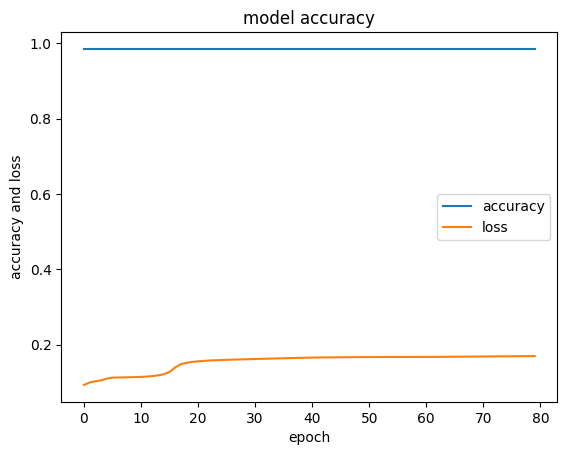

In [82]:
plt.plot(model.accuracies)
plt.plot(model.losses)
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy and loss')
plt.legend(['accuracy','loss'])

* **Check your predict method with images of the numbers you wrote in your own handwriting**

* **Implement OneHotEncoder and OneHotDecoder functions from scratch, Then compare your function with Scikit-Learn**